Test example:  1/45 | Predicted: 1 | Actual: 1 | Match: True
Test example: 11/45 | Predicted: 1 | Actual: 1 | Match: True
Test example: 21/45 | Predicted: 0 | Actual: 0 | Match: True
Test example: 31/45 | Predicted: 0 | Actual: 0 | Match: True
Test example: 41/45 | Predicted: 2 | Actual: 2 | Match: True
		33 matches out of 45 examples
		Test set accuracy: 0.7333

Test example:  1/45 | Predicted: 1 | Actual: 1 | Match: True
Test example: 11/45 | Predicted: 0 | Actual: 1 | Match: False
Test example: 21/45 | Predicted: 0 | Actual: 0 | Match: True
Test example: 31/45 | Predicted: 0 | Actual: 0 | Match: True
Test example: 41/45 | Predicted: 1 | Actual: 2 | Match: False
		28 matches out of 45 examples
		Test set accuracy: 0.6222

Test example:  1/45 | Predicted: 1 | Actual: 1 | Match: True
Test example: 11/45 | Predicted: 1 | Actual: 1 | Match: True
Test example: 21/45 | Predicted: 0 | Actual: 0 | Match: True
Test example: 31/45 | Predicted: 0 | Actual: 0 | Match: True
Test example: 41/45 | 

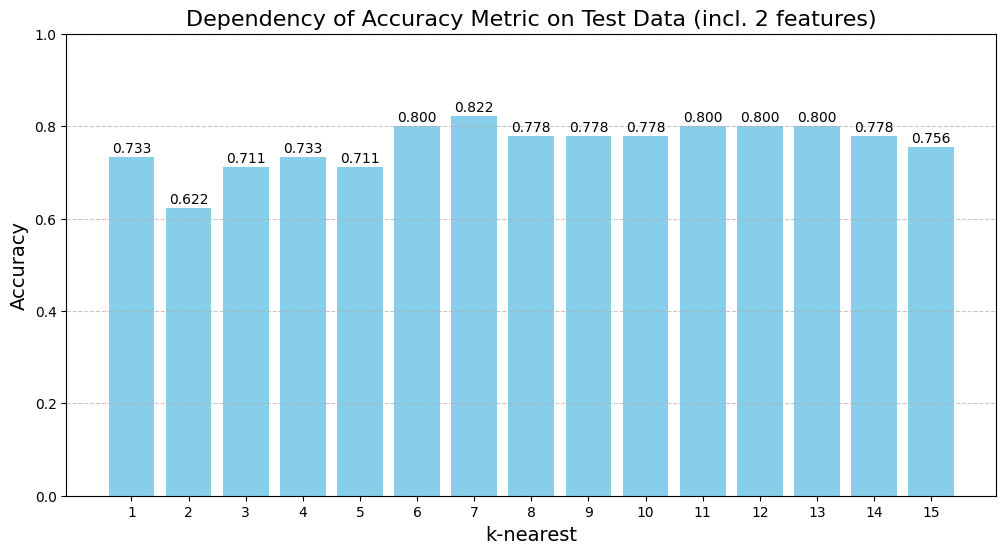

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

class KNN:
    def __init__(self, nb_features, nb_classes, data, k, weighted=False):
        self.nb_features = nb_features
        self.nb_classes = nb_classes
        self.k = k
        self.weighted = weighted
        self.X = tf.convert_to_tensor(data['x'], dtype=tf.float32)
        self.Y = tf.convert_to_tensor(data['y'], dtype=tf.int32)

    def predict(self, query_data):
        nb_queries = len(query_data['x'])
        if 'y' in query_data:
            true_labels = query_data['y']
            calculate_accuracy = True
        else:
            calculate_accuracy = False
        matches = 0
        for i in range(nb_queries):
            dists = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(self.X, query_data['x'][i])), axis=1))
            _, idxs = tf.nn.top_k(-dists, self.k)
            classes = tf.gather(self.Y, idxs)
            dists = tf.gather(dists, idxs)
            if self.weighted:
                w = 1 / self.dists
            else:
                w = tf.fill([self.k], 1/self.k)
            w_col = tf.reshape(w, (self.k, 1))
            classes_one_hot = tf.one_hot(classes, self.nb_classes)
            scores = tf.reduce_sum(w_col * classes_one_hot, axis=0)
            hyp = tf.argmax(scores)
            if calculate_accuracy:
                actual = true_labels[i]
                match = (hyp == actual)
                if match:
                    matches += 1
                if i % 10 == 0:
                    print(f'Test example: {i+1:2}/{nb_queries} | Predicted: {hyp} | Actual: {actual} | Match: {match}')
        if calculate_accuracy:
            accuracy = matches / nb_queries
            print(f'\t\t{matches} matches out of {nb_queries} examples')
            print(f'\t\tTest set accuracy: {accuracy:.4f}\n')
            return accuracy

# --------------------------------------------------------- #
tadija_path = '/content/drive/MyDrive/ML2024_D1/iris.csv'
mina_path = '/content/drive/MyDrive/6003 ML/data/iris.csv'
# --------------------------------------------------------- #
data = dict()
data['x'] = np.loadtxt(mina_path, delimiter=',', skiprows=1, usecols=(0, 1), dtype='float32')
data['y'] = np.loadtxt(mina_path, delimiter=',', skiprows=1, usecols=(4), dtype='U20')

unique_values = np.unique(data['y'])
y_mapping = {label: i for i, label in enumerate(unique_values)}

# Random shuffling
nb_samples = data['x'].shape[0]
indices = np.random.permutation(nb_samples)
data['x'] = data['x'][indices]
data['y'] = data['y'][indices]

# Normalization
data['x'] = (data['x'] - np.mean(data['x'], axis=0)) / np.std(data['x'], axis=0)

# Splitting data 70:30
index_70_percent = int(len(data['x']) * 0.7)
train_data, test_data = dict(), dict()
train_data['x'] = data['x'][:index_70_percent]
train_data['y'] = [y_mapping[label] for label in data['y'][:index_70_percent]]
test_data['x'] = data['x'][index_70_percent:]
test_data['y'] = [y_mapping[label] for label in data['y'][index_70_percent:]]

# Reshaping
train_data['x'] = np.reshape(train_data['x'], [len(train_data['x']), -1])
test_data['x'] = np.reshape(test_data['x'], [len(test_data['x']), -1])

nb_features = 2
nb_classes = len(unique_values)
ks = list(range(1, 16))  # Values of k from 1 to 15

accuracies = []
for k in ks:
    knn = KNN(nb_features, nb_classes, train_data, k, weighted=False)
    accuracy = knn.predict(test_data)
    accuracies.append(accuracy)

# Plotting accuracy histogram vs. k
plt.figure(figsize=(12, 6))
plt.bar(ks, accuracies, color='skyblue')
plt.title('Dependency of Accuracy Metric on Test Data (incl. 2 features)', fontsize=16)
plt.xlabel('k-nearest', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(ks)
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(ks[i], acc + 0.01, f'{acc:.3f}', ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Najbolji izbor je k kada je 7, jer je tada accuracy najveca, tj. 0.822.